# TITLE

# CONTENTS

# A. BUSINESS UNDERSTANDING

# B. DATA UNDERSTANDING

# C. DATA PREPARATION

## EDA and Data Cleaning

In [48]:
# Import necessary libraries for data preparation
import pandas as pd
import numpy as np

In [49]:
ratings_df = pd.read_csv('Data/ratings.csv')
movies_df = pd.read_csv('Data/movies.csv')
tags_df = pd.read_csv('Data/tags.csv')
links_df = pd.read_csv('Data/links.csv')

In [50]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [51]:
ratings_df.shape

(100836, 4)

In [52]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [53]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [54]:
ratings_df.value_counts()

userId  movieId  rating  timestamp 
1       1        4.0     964982703     1
434     4993     5.0     1270604133    1
        4963     4.0     1270604560    1
        4896     2.5     1270604915    1
        4886     4.5     1270604658    1
                                      ..
227     58303    4.0     1447210409    1
        56782    4.5     1447210013    1
        56367    4.5     1447210824    1
        55820    4.0     1447209881    1
610     170875   3.0     1493846415    1
Name: count, Length: 100836, dtype: int64

In [55]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
movies_df.shape

(9742, 3)

In [57]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [58]:
movies_df.value_counts()

movieId  title                                                  genres                                     
1        Toy Story (1995)                                       Adventure|Animation|Children|Comedy|Fantasy    1
53322    Ocean's Thirteen (2007)                                Crime|Thriller                                 1
53129    Mr. Brooks (2007)                                      Crime|Drama|Thriller                           1
53138    Librarian: Return to King Solomon's Mines, The (2006)  Action|Adventure|Fantasy                       1
53140    Librarian: Quest for the Spear, The (2004)             Action|Adventure|Comedy|Fantasy|Romance        1
                                                                                                              ..
4390     Rape Me (Baise-moi) (2000)                             Crime|Drama|Thriller                           1
4392     Alice (1990)                                           Comedy|Drama|Fantasy|Romance         

In [59]:
movies_df.duplicated().sum()

0

In [60]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [61]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [62]:
# Create one-hot encoding for movie genres
genres_dummies = movies_df['genres'].str.get_dummies(sep='|')
# Join the one-hot encoded genres back to the movies_df
movies_df = pd.concat([movies_df, genres_dummies], axis=1)

In [63]:
# Create a copy of movies_df
movies_df_copy = movies_df.copy()

# Drop the 'genres' and '(no genres listed)' columns
columns_to_drop = ['genres', '(no genres listed)']
movies_df_copy.drop(columns=columns_to_drop, inplace=True)

In [64]:
# Merge movies_df and ratings_df on the 'movieId' column
combined_df = ratings_df.merge(movies_df_copy, on='movieId', how='inner')

# Print the first few rows of the combined DataFrame
combined_df.head()


,userId,movieId,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,Toy Story (1995),0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,Toy Story (1995),0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,Toy Story (1995),0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


KeyError: 'genres'

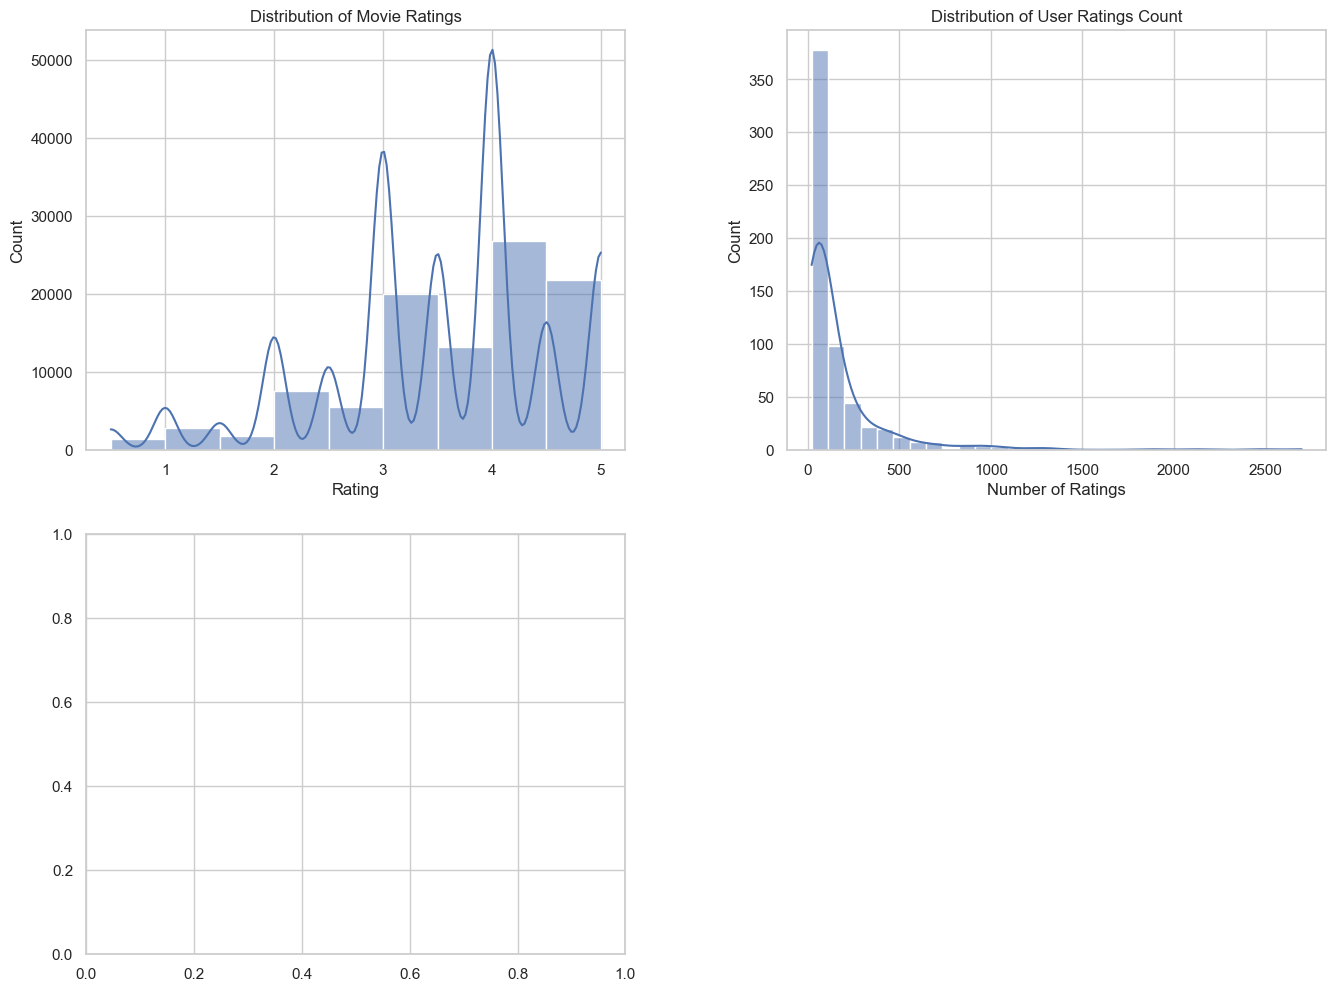

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(16, 12))
plt.subplots_adjust(wspace=0.3)

# Plot 1: Distribution of Movie Ratings
plt.subplot(2, 2, 1)
sns.histplot(combined_df['rating'], bins=9, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Plot 2: Distribution of User Ratings Count
plt.subplot(2, 2, 2)
user_ratings_count = combined_df['userId'].value_counts()
sns.histplot(user_ratings_count, bins=30, kde=True)
plt.title('Distribution of User Ratings Count')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')

# Plot 3: Distribution of Genres
plt.subplot(2, 2, 3)
# Flatten the genres column and split the genres
genres = combined_df['genres'].str.split('|', expand=True).stack()
sns.countplot(y=genres, order=genres.value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

# Show the plots
plt.tight_layout()
plt.show()

more eda here- distribution by genre

In [22]:
# Filter out movies with ratings under 3.5 stars
min_rating_threshold = 3.5
filtered_ratings_df = ratings_df[ratings_df['rating'] >= min_rating_threshold]

# Filter out movies with too few ratings (adjust min_ratings as needed)
min_ratings = 50
filtered_ratings_df = filtered_ratings_df.groupby('movieId').filter(lambda x: len(x) >= min_ratings)

### Feature engineering 'filtered_ratings_df'

In [23]:
# Calculate the average rating for each movie. This feature can provide insights into the overall popularity 
# and user sentiment toward each movie
average_ratings = filtered_ratings_df.groupby('movieId')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'avg_rating'}, inplace=True)
filtered_ratings_df = filtered_ratings_df.merge(average_ratings, on='movieId', how='left')

In [24]:
# Create a feature that represents the number of ratings each movie has received. This can help the model 
# understand how well-known and frequently rated a movie is
num_ratings = filtered_ratings_df.groupby('movieId')['rating'].count().reset_index()
num_ratings.rename(columns={'rating': 'num_ratings'}, inplace=True)
filtered_ratings_df = filtered_ratings_df.merge(num_ratings, on='movieId', how='left')

In [25]:
# Calculate the average rating given by each user. This feature can capture each user's general rating behavior
average_user_ratings = filtered_ratings_df.groupby('userId')['rating'].mean().reset_index()
average_user_ratings.rename(columns={'rating': 'avg_user_rating'}, inplace=True)
filtered_ratings_df = filtered_ratings_df.merge(average_user_ratings, on='userId', how='left')

In [26]:
# Create a feature that represents the strength of the interaction between a user and an item. This can be 
# calculated by multiplying the user's rating by the number of ratings given by the user
filtered_ratings_df['interaction_strength'] = filtered_ratings_df['rating'] * filtered_ratings_df['num_ratings']

In [27]:
filtered_ratings_df.head()

,userId,movieId,rating,timestamp,avg_rating,num_ratings,avg_user_rating,interaction_strength
0,1,1,4.0,964982703,4.284848,165,4.685714,660.0
1,1,6,4.0,964982224,4.322368,76,4.685714,304.0
2,1,47,5.0,964983815,4.369427,157,4.685714,785.0
3,1,50,5.0,964982931,4.497126,174,4.685714,870.0
4,1,110,4.0,964982176,4.422872,188,4.685714,752.0


In [28]:
filtered_ratings_df = filtered_ratings_df.drop('timestamp', axis=1)

In [29]:
unique_user_ids = filtered_ratings_df['userId'].nunique()
unique_movie_ids = filtered_ratings_df['movieId'].nunique()

print(f"Number of unique user IDs: {unique_user_ids}")
print(f"Number of unique movie IDs: {unique_movie_ids}")

Number of unique user IDs: 603
Number of unique movie IDs: 242


In [30]:
filtered_ratings_df.shape

(21464, 7)

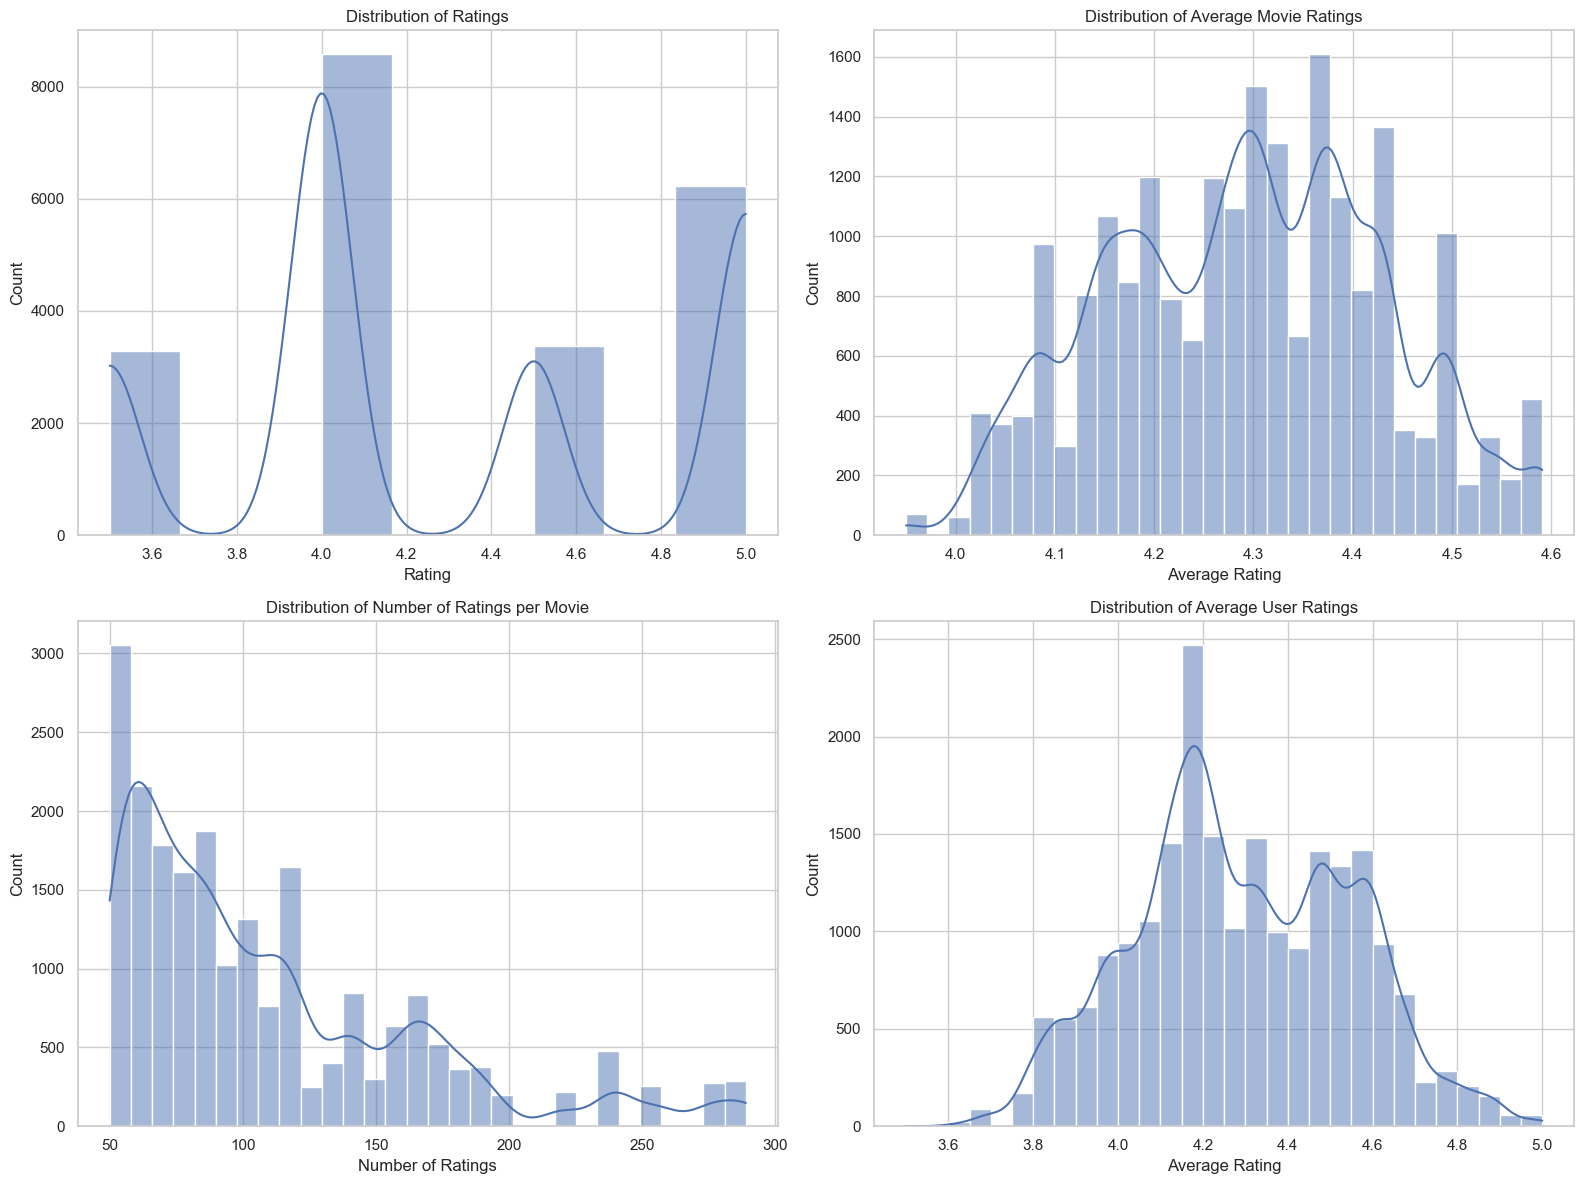

In [31]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(16, 12))
plt.subplots_adjust(wspace=0.3)

# Plot 1: Distribution of 'rating'
plt.subplot(2, 2, 1)
sns.histplot(filtered_ratings_df['rating'], bins=9, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Plot 2: Distribution of 'avg_rating'
plt.subplot(2, 2, 2)
sns.histplot(filtered_ratings_df['avg_rating'], bins=30, kde=True)
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')

# Plot 3: Distribution of 'num_ratings'
plt.subplot(2, 2, 3)
sns.histplot(filtered_ratings_df['num_ratings'], bins=30, kde=True)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')

# Plot 4: Distribution of 'avg_user_rating'
plt.subplot(2, 2, 4)
sns.histplot(filtered_ratings_df['avg_user_rating'], bins=30, kde=True)
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

## Collaborative Filtering
### Model 1: Surprise (Matrix Factorization with SVD)

In [32]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict

In [33]:
# Set a fixed random seed for reproducibility
random_seed = 42

# Create a Surprise Dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(filtered_ratings_df[['userId', 'movieId', 'rating']], reader)

# Split the dataset into train and test sets with the fixed random seed
trainset, testset = train_test_split(data, test_size=0.2, random_state=random_seed)

# Train the SVD model (or any other collaborative filtering model) with the fixed random seed
first_model = SVD(random_state=random_seed)
first_model.fit(trainset)

# Make predictions on the test set
first_preds = first_model.test(testset)

In [34]:
# Calculate and print RMSE and MAE evaluation metrics
rmse = accuracy.rmse(first_preds)
mae = accuracy.mae(first_preds)

RMSE: 0.4718
MAE:  0.3990


In [35]:
print(f"First Model RMSE: {rmse:.4f}")
print(f"First Model MAE: {mae:.4f}")

First Model RMSE: 0.4718
First Model MAE: 0.3990


In [36]:
# Specify the user for whom you want to get recommendations
user_id = 123  # Replace with the desired user ID

# Get all movie IDs that the user has not rated
all_movie_ids = set(filtered_ratings_df['movieId'].unique())
rated_movie_ids = set(filtered_ratings_df[filtered_ratings_df['userId'] == user_id]['movieId'])
unrated_movie_ids = list(all_movie_ids - rated_movie_ids)

# Predict ratings for unrated movies for the specified user
user_top_predictions = []
for movie_id in unrated_movie_ids:
    prediction = first_model.predict(user_id, movie_id)
    user_top_predictions.append(prediction)

# Sort the predictions by estimated rating in descending order
user_top_predictions.sort(key=lambda x: x.est, reverse=True)

# Get the top 10 recommended movie titles
top_10_user_movie_ids = [prediction.iid for prediction in user_top_predictions[:10]]
top_10_user_movie_titles = movies_df_copy[movies_df_copy['movieId'].isin(top_10_user_movie_ids)]['title'].values

# Print the top 10 recommended movie titles for the specific user
print(f"Top 10 Movie Recommendations for User {user_id}:")
for i, title in enumerate(top_10_user_movie_titles, start=1):
    print(f"Top {i}: {title}")


Top 10 Movie Recommendations for User 123:
Top 1: Schindler's List (1993)
Top 2: Blade Runner (1982)
Top 3: Godfather, The (1972)
Top 4: Rear Window (1954)
Top 5: Wizard of Oz, The (1939)
Top 6: Monty Python's Life of Brian (1979)
Top 7: 12 Angry Men (1957)
Top 8: Psycho (1960)
Top 9: Life Is Beautiful (La Vita è bella) (1997)
Top 10: Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)


### attempt at content-based filtering

In [37]:
movies_df_copy.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
movies_df_copy.columns

Index(['movieId', 'title', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

## Model 2: Collaborative Filtering with SKLearn GradientBoostingRegressor

In this section, we will implement a collaborative filtering model using the Gradient Boosting algorithm. Collaborative filtering relies on user-item interactions to make recommendations. We will use the `GradientBoostingRegressor` from scikit-learn to build this model. The model will be trained on the training data and evaluated on the test data using RMSE (Root Mean Squared Error).


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from tensorflow import keras

# Split data into train and test sets
train_data, test_data = train_test_split(filtered_ratings_df, test_size=0.2, random_state=42)

# Collaborative Filtering component
second_model = GradientBoostingRegressor()
second_model.fit(train_data[['userId', 'movieId']], train_data['rating'])
second_preds = second_model.predict(test_data[['userId', 'movieId']])

2023-11-05 20:52:10.974357: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
from sklearn.metrics import mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(np.mean((second_preds - test_data['rating'])**2))
print(f'Second Model RMSE: {rmse}')
# Calculate MAE
mae = mean_absolute_error(test_data['rating'], second_preds)
print(f'Second Model MAE: {mae}')

Second Model RMSE: 0.5128025948358477
Second Model MAE: 0.4577379896353617


In [41]:
# Specify the user for whom you want to get recommendations
user_id = 123  # Replace with the desired user ID

# Filter the test data for the specific user
user_test_data = test_data[test_data['userId'] == user_id]

# Make predictions for the user's movie ratings
user_predictions = second_model.predict(user_test_data[['userId', 'movieId']])

# Create a DataFrame with the movieId and predicted ratings
user_predictions_df = pd.DataFrame({'movieId': user_test_data['movieId'], 'predicted_rating': user_predictions})

# Sort the predictions in descending order to get the top recommendations
top_user_recommendations = user_predictions_df.sort_values(by='predicted_rating', ascending=False)

# Get the top 10 recommended movie titles
top_10_user_movie_ids = top_user_recommendations.head(10)['movieId'].values

# Retrieve the movie titles from the movies_df_copy DataFrame
top_10_user_movie_titles = movies_df_copy[movies_df_copy['movieId'].isin(top_10_user_movie_ids)]['title'].values

# Print the top 10 recommended movie titles for the specific user
print(f"Top 10 Movie Recommendations for User {user_id}:")
for i, title in enumerate(top_10_user_movie_titles, start=1):
    print(f" {i} : {title}")


Top 10 Movie Recommendations for User 123:
 1 : Shawshank Redemption, The (1994)
 2 : Matrix, The (1999)


## Model 3: Collaborative Filtering with KNNWithMeans

In [42]:
# Import necessary libraries
from surprise import KNNWithMeans, Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Create a Surprise Dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(filtered_ratings_df[['userId', 'movieId', 'rating']], reader)

# Build the training set
trainset = data.build_full_trainset()

# Create the KNNWithMeans model
sim_options = {
    'name': 'cosine',  # You can choose similarity options like 'cosine' or 'pearson'
    'user_based': False,  # Set to True for item-based collaborative filtering
}
knn_model = KNNWithMeans(sim_options=sim_options)

# Fit the KNN model on the training data
knn_model.fit(trainset)

# Make predictions with both models
knn_predictions = knn_model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [43]:
# Calculate RMSE and MAE
rmse = accuracy.rmse(knn_predictions)
mae = accuracy.mae(knn_predictions)

print(f'KNN Model RMSE: {rmse}')
print(f'KNN Model MAE: {mae}')

RMSE: 0.4075
MAE:  0.3412
KNN Model RMSE: 0.40751431646715963
KNN Model MAE: 0.34115972671848543


In [44]:
# Create a list to store true ratings and predicted ratings
true_ratings = [prediction.r_ui for prediction in knn_predictions]
predicted_ratings = [prediction.est for prediction in knn_predictions]

In [45]:
predicted_ratings

[4.458545041805739,
 4.211519416576489,
 4.503850587660585,
 4.294824055241763,
 4.3571486206617305,
 5,
 3.689601992940504,
 4.211441667199245,
 3.7230988254487625,
 4.386779118550374,
 4.250979934045701,
 3.869737298330713,
 4.568160063491776,
 3.8873002764729314,
 4.032835553502936,
 4.477433171253746,
 4.116282498091716,
 4.503899869626826,
 3.633236979927269,
 4.015069660445802,
 4.599149823613016,
 4.589162205829489,
 3.867988937425449,
 4.808431663862302,
 4.65933759655051,
 3.948445528923811,
 4.808803516179616,
 4.205641598141763,
 4.7885147153644185,
 4.191530290382317,
 4.702499004316724,
 4.2625126035214596,
 4.06898028229862,
 4.1983915188652,
 4.116760574507983,
 4.522690690174133,
 4.207121609312131,
 4.161817492406074,
 3.912929976053204,
 4.3701800850850026,
 4.255891003609277,
 4.473684627388336,
 4.348058306781488,
 4.5853545563501195,
 4.564181801848329,
 4.492915454706732,
 4.7742340061935336,
 4.43045360818273,
 4.535298913096066,
 4.104083953436989,
 4.3806280370